In [41]:
#ライブラリのインポート
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator

In [42]:
#データの読み込み
anime_data = pd.read_csv("./anime.csv")
rating_data = pd.read_csv("./rating.csv")
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [43]:
rating_data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [44]:
len(anime_data)

12294

In [45]:
len(rating_data)

7813737

In [46]:
rating_data.sample(n=100000).sort_values('user_id', ascending=True)

,user_id,anime_id,rating
56,1,9181,-1
89,1,13357,-1
63,1,9790,-1
91,1,13411,-1
5,1,355,-1
...,...,...,...
7813285,73507,6637,9
7813481,73511,1840,8
7813556,73515,167,9
7813659,73515,4765,8


In [47]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [48]:
rating_data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


<AxesSubplot:>

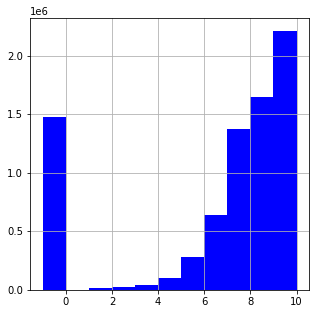

In [49]:
#各評価値のおおよその個数を確認
rating_data["rating"].hist(bins=11, figsize=(5, 5), color="b")

In [50]:
rating_data.replace(-1, np.nan, inplace=True)
rating_data.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [51]:
#人気アニメの確認
anime_data.sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [52]:
#基本統計量の確認
print(anime_data.describe())
print(rating_data.describe())

           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06
            user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  6.337241e+06
mean   3.672796e+04  8.909072e+03  7.808497e+00
std    2.099795e+04  8.883950e+03  1.572496e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.897400e+04  1.240000e+03  7.000000e+00
50%    3.679100e+04  6.213000e+03  8.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01


In [53]:
#データクレンジング
#レコメンド精度向上のために極端にmembersが少ないアニメを削除
new_anime_data = anime_data[anime_data["members"]>5000]
new_anime_data["episodes"] = new_anime_data["episodes"].replace({"Unknown": "0"})

<ipython-input-53-2007e39366c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_anime_data["episodes"] = new_anime_data["episodes"].replace({"Unknown": "0"})


In [54]:
#欠損値の確認
print(new_anime_data.isnull().sum())

anime_id     0
name         0
genre        3
type         5
episodes     0
rating      74
members      0
dtype: int64


In [55]:
#欠損値の削除
new_anime_data = new_anime_data.dropna()
new_anime_data.isnull().sum()
new_anime_data
print(new_anime_data.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [56]:
#再度基本統計量を確認
print(new_anime_data.describe())

           anime_id       rating       members
count   3911.000000  3911.000000  3.911000e+03
mean   10648.833291     7.284019  5.421194e+04
std    10501.672838     0.679322  8.667340e+04
min        1.000000     2.000000  5.001000e+03
25%     1497.000000     6.880000  1.011850e+04
50%     6927.000000     7.320000  2.213100e+04
75%    17795.000000     7.720000  5.852800e+04
max    34240.000000     9.370000  1.013917e+06


In [57]:
new_anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12122,31283,Bikini Warriors Special,"Comedy, Ecchi, Fantasy, Parody, Yuri",Special,1,5.50,5191
12207,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551
12209,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463
12213,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411


In [58]:
new_anime_data.to_csv("new_anime_data.csv")

In [17]:
# raitingの値が0以上のみ残す
rating_data = rating_data[rating_data["rating"] >= 0]
print(rating_data.describe())

         Unnamed: 0        user_id       anime_id         rating
count  8.107740e+05  810774.000000  810774.000000  810774.000000
mean   3.908614e+06   36742.347429    8905.796892       7.809047
std    2.259450e+06   21031.941473    8878.115263       1.572054
min    1.570000e+02       3.000000       1.000000       1.000000
25%    1.951523e+06   18956.000000    1239.000000       7.000000
50%    3.906770e+06   36791.000000    6213.000000       8.000000
75%    5.878264e+06   54893.000000   14131.000000       9.000000
max    7.813713e+06   73515.000000   34325.000000      10.000000


In [18]:
#データフレームを結内部結合させる
data = pd.merge(rating_data, new_anime_data, on = "anime_id", how="inner")
data.rename(columns={'rating_x': 'rating'}, inplace=True)
data.rename(columns={'rating_y': 'rating_mean'}, inplace=True)
data

,Unnamed: 0,user_id,anime_id,rating,name,genre,type,episodes,rating_mean,members
0,240,3,28171,10.0,Shokugeki no Souma,"Ecchi, School, Shounen",TV,24,8.61,348951
1,28278,321,28171,10.0,Shokugeki no Souma,"Ecchi, School, Shounen",TV,24,8.61,348951
2,33025,371,28171,8.0,Shokugeki no Souma,"Ecchi, School, Shounen",TV,24,8.61,348951
3,34257,379,28171,9.0,Shokugeki no Souma,"Ecchi, School, Shounen",TV,24,8.61,348951
4,50818,534,28171,9.0,Shokugeki no Souma,"Ecchi, School, Shounen",TV,24,8.61,348951
...,...,...,...,...,...,...,...,...,...,...
786491,6684606,61651,18655,8.0,Koikishi Purely☆Kiss The Animation,Hentai,OVA,2,7.32,5320
786492,7078595,66055,28539,8.0,Garo Movie: Divine Flame,"Action, Demons, Fantasy, Magic, Supernatural",Movie,1,7.18,7179
786493,7483562,69952,30641,8.0,Yankee-kun na Yamada-kun to Megane-chan to Majo,"Comedy, School, Shounen",Special,1,7.48,7170
786494,7761809,73075,30641,8.0,Yankee-kun na Yamada-kun to Megane-chan to Majo,"Comedy, School, Shounen",Special,1,7.48,7170


In [19]:
data.describe()

,Unnamed: 0,user_id,anime_id,rating,rating_mean,members
count,7.864960e+05,786496.000000,786496.000000,786496.00000,786496.000000,7.864960e+05
mean,3.904263e+06,36702.307933,8958.139057,7.84426,7.709828,1.899611e+05
std,2.260687e+06,21042.963585,8902.499862,1.55045,0.637865,1.910207e+05
min,1.570000e+02,3.000000,1.000000,1.00000,2.000000,5.001000e+03
25%,1.946848e+06,18911.000000,1195.000000,7.00000,7.330000,5.181600e+04
50%,3.896820e+06,36669.000000,6347.000000,8.00000,7.720000,1.229760e+05
75%,5.877383e+06,54884.000000,14227.000000,9.00000,8.170000,2.650050e+05
max,7.813713e+06,73515.000000,34240.000000,10.00000,9.370000,1.013917e+06


In [20]:
#データ量が多すぎて計算量が多く、PCのスペック上無理なのでデータ数を制限
data2 = data[['user_id', 'name', 'rating']]
data2 = data2[data2["user_id"] <= 10000]

In [21]:
#ユーザーID、アニメ名、ユーザー評価でピボットテーブルの作成
piv_rating = pd.pivot_table(data2, index=['user_id'], columns=['name'], values='rating')
piv_rating

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#標準化するためにそれぞれの評価値から平均を引く
#評価が一つのみ、または同じ評価をしたユーザーを全て削除する

#値の正規化
piv_norm = piv_rating.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

#評価しなかった人を表す0のみを含むすべての列を削除する
piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

In [23]:
#疎行列の作成
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)

In [24]:
#cos類似度の行列を作成
item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)

In [25]:
#行列をデータフレームにする
item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)


In [26]:
#cos類似度の最も高いtop10のアニメを返す関数
def top_anime(anime_name):
    count = 1
    print('Similar show to {} include:\n'.format(anime_name))
    for item in item_sim_df.sort_values(by = anime_name, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count += 1

In [27]:
#類似性の最も高いユーザー5人を返す関数
def top_users(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim)) 

In [28]:
#類似しているユーザーごとに最も評価の高いアニメを含むリストを作成し、アニメ名とリストに表示される頻度を返す関数
def similar_user_recs(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:, i].max()
        best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]

In [29]:
#類似しているユーザーの重み平均を計算して入力ユーザーの潜在的な評価を決定し表示する関数
def predicted_rating(anime_name, user):
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = piv_rating.loc[i, anime_name]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)

In [30]:
top_anime("Hunter x Hunter (2011)")

Similar show to Hunter x Hunter (2011) include:

No. 1: One Piece: Episode of Sabo - 3 Kyoudai no Kizuna Kiseki no Saikai to Uketsugareru Ishi
No. 2: Mobile Suit Gundam: Iron-Blooded Orphans
No. 3: Gintama: Jump Festa 2014 Special
No. 4: Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou
No. 5: Hikaru no Go
No. 6: Kuroko no Basket 2nd Season NG-shuu
No. 7: Nerawareta Gakuen
No. 8: Saraiya Goyou
No. 9: Akagami no Shirayuki-hime 2nd Season
No. 10: Gintama&#039;: Enchousen


In [31]:
top_users(52)

Most Similar Users:

User #3122, Similarity value: 0.61
User #2402, Similarity value: 0.59
User #8628, Similarity value: 0.59
User #9289, Similarity value: 0.59
User #2685, Similarity value: 0.57
User #9964, Similarity value: 0.54
User #3902, Similarity value: 0.53
User #4307, Similarity value: 0.52
User #817, Similarity value: 0.51
User #6460, Similarity value: 0.51


In [32]:
similar_user_recs(52)

[('Ookami to Koushinryou II', 1),
 ('Break Blade 3: Kyoujin no Ato', 1),
 ('Soul Eater', 1),
 ('Akame ga Kill!', 1),
 ('Toradora!', 1)]

In [33]:
predicted_rating("Hunter x Hunter (2011)", 52)

9.698695619726006